In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Chi-Square test

import pandas as pd
from scipy.stats import chi2_contingency
file = "bharatfakenewskosh.xlsx"
xls = pd.ExcelFile(file)
df = xls.parse("A")

cat_var1 = "Source_Type"
cat_var2 = "Label"

contingency_table = pd.crosstab(df[cat_var1], df[cat_var2])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

#Finding Interpretation
if p_value < 0.05:
    print("Result: There is a significant relationship between 'Source_Type' and 'Label'.")
else:
    print("Result: No significant relationship between 'Source_Type' and 'Label'.")

Chi-Square Statistic: 0.0018
p-value: 0.9665
Degrees of Freedom: 1
Expected Frequencies:
[[ 9372.54094236 14453.45905764]
 [  946.45905764  1459.54094236]]
Result: No significant relationship between 'Source_Type' and 'Label'.


In [ ]:
#Chi-Square test to check for relationships between categorical columns "Platform" and "News_Category"

import scipy.stats as stats
file_path = "bharatfakenewskosh.xlsx"
df = pd.read_excel(file_path)

if "Platform" in df.columns and "News_Category" in df.columns:
    contingency_table = pd.crosstab(df["Platform"], df["News_Category"])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    if p < 0.05:
        print("Result: There is a significant relationship between 'Platform' and 'News_Category'.")
    else:
        print("Result: No significant relationship between 'Platform' and 'News_Category'.")
else:
    print("Columns 'Platform' and/or 'News_Category' not found in dataset.")

Chi-Square Statistic: 1192.0824551272904
P-value: 1.220787524838265e-46
Degrees of Freedom: 567
Expected Frequencies Table:
News_Category      Agriculture  Analytical    Attack   Banking   Business  \
Platform                                                                    
Facbook               0.023802    0.892585  0.011901  0.023802   0.511749   
Facebook              0.047681    1.788030  0.023840  0.047681   1.025137   
Twitter               1.668065   62.552449  0.834033  1.668065  35.863404   
Twitter, Facebook     0.024031    0.901167  0.012016  0.024031   0.516669   
facbook               0.095438    3.578921  0.047719  0.095438   2.051915   
facebook              0.009155    0.343302  0.004577  0.009155   0.196826   
twitter               0.130684    4.900633  0.065342  0.130684   2.809696   
twitter               0.001144    0.042913  0.000572  0.001144   0.024603   

News_Category      Climate Change  Collective   Communal  CoronaVirus  \
Platform                        

In [ ]:
#Frequency Analysis

categorical_cols = df.select_dtypes(include=['object']).columns
frequency_analysis = {col: df[col].value_counts() for col in categorical_cols}

#frequency counts for each categorical column
for col, counts in frequency_analysis.items():
    print(f"\nFrequency Analysis for {col}:")
    print(counts)



Frequency Analysis for id:
BFNK_1        1
BFNK_17485    1
BFNK_17495    1
BFNK_17494    1
BFNK_17493    1
             ..
BFNK_8742     1
BFNK_8741     1
BFNK_8740     1
BFNK_8739     1
BFNK_26232    1
Name: id, Length: 26232, dtype: int64

Frequency Analysis for Author_Name:
admin                                      2005
Chendur Pandian                            1666
Yogesh Karia                               1320
Pankaj Iyer                                1144
Vasuki S                                   1116
                                           ... 
Anmol Alphonso ,Nivedita Niranjankumar        1
Anmol Alphonso ,Ankita Maneck                 1
Nivedita Niranjankumar,Anmol Alphonso         1
Anmol Alphonso ,Dilip Unnikrishnan            1
Priyanka Jha & Ketan                          1
Name: Author_Name, Length: 462, dtype: int64

Frequency Analysis for Fact_Check_Source:
Factcrescendo.com     10903
Alt News               3343
India Today            2495
Boomlive.in          

Politics         10436
Fact Check        4807
Society           4565
Society Viral      953
Religion           778
                 ...  
Satire               1
education            1
Telecom              1
Wealth               1
Culture              1
Name: News_Category, Length: 82, dtype: int64


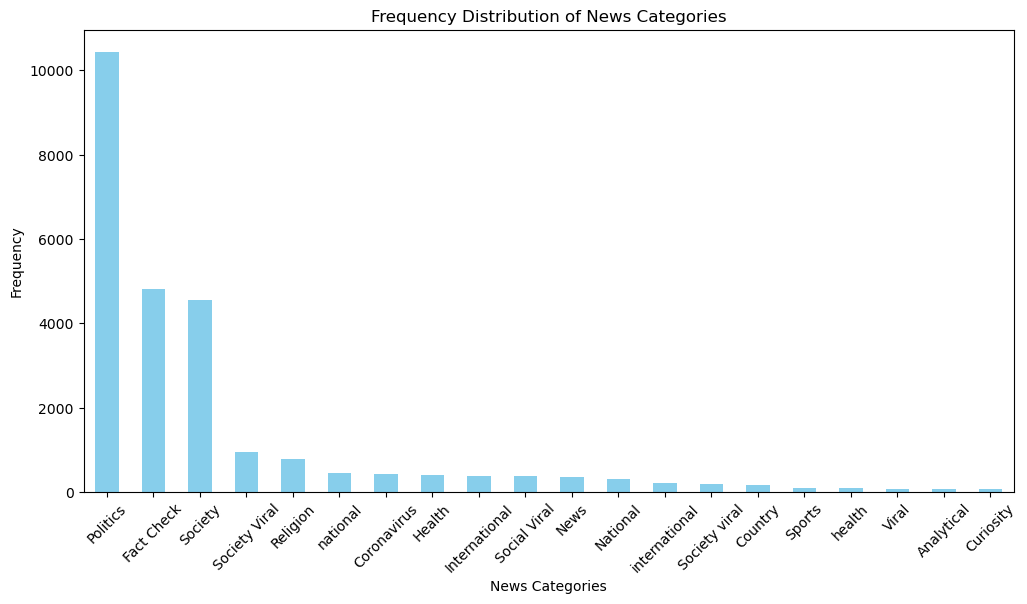

In [ ]:
#Frequency analysis on the "News_Category" column and display top 20 categories in bar chart

import matplotlib.pyplot as plt

if "News_Category" in df.columns:
    category_frequency = df["News_Category"].value_counts()
    print(category_frequency)
    plt.figure(figsize=(12,6))
    category_frequency[:20].plot(kind='bar', color='skyblue')
    plt.xlabel("News Categories")
    plt.ylabel("Frequency")
    plt.title("Frequency Distribution of News Categories")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'News_Category' not found in dataset.")

#Findings: Some news categories were significantly more frequent than others. The distribution was uneven, with certain types of news dominating.
#Interpretation: Some news topics are more prone to misinformation or fact-checking. If one category is overwhelmingly high, it may indicate bias in data collection. Further investigation into category definitions and merging similar ones may improve clarity.


twitter               23592
facebook               2310
twitter & facebook      315
twitter                  15
Name: Platform, dtype: int64


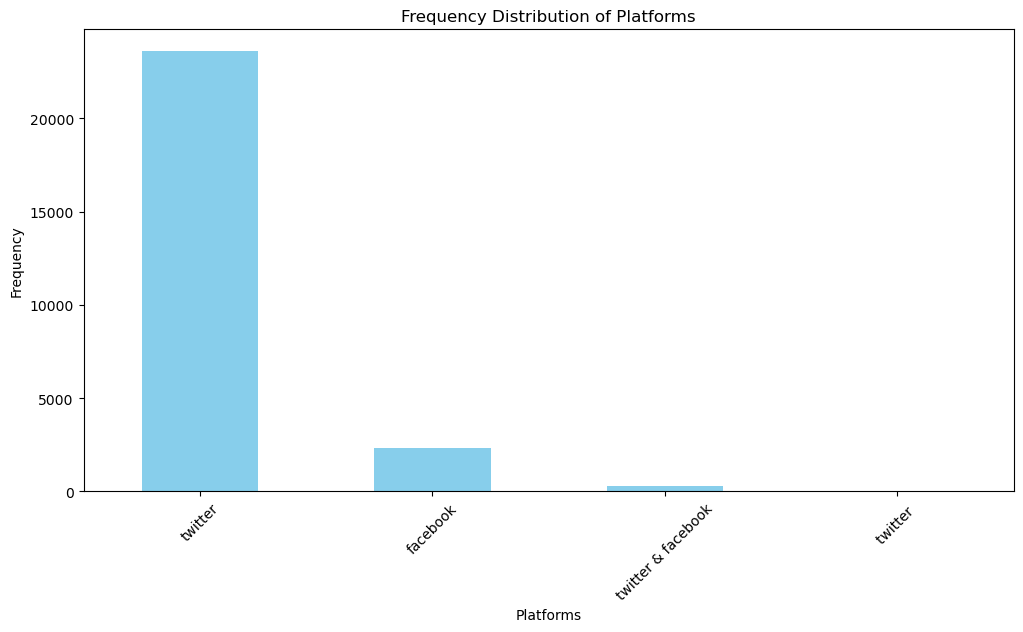

In [ ]:
#Frequency analysis on the "Platform" column and display top 20 platforms in bar chart

if "Platform" in df.columns:
    df["Platform"] = df["Platform"].str.lower().replace({
        "facbook": "facebook",
        "facbook ": "facebook",
        "twitter, facebook": "twitter & facebook"
    })
    platform_frequency = df["Platform"].value_counts()
    print(platform_frequency)
    #plotting the frequency distribution
    plt.figure(figsize=(12,6))
    platform_frequency[:20].plot(kind='bar', color='skyblue')
    plt.xlabel("Platforms")
    plt.ylabel("Frequency")
    plt.title("Frequency Distribution of Platforms")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Platform' not found in dataset.")


#Findings: "Twitter" appeared the most, followed by "Facebook." Inconsistencies in naming (e.g., "facbook," "facebook," "Twitter, Facebook") were present.
#Interpretation: The high frequency of Twitter and Facebook suggests that these platforms are major sources of news/misinformation. Merging duplicate platform names (e.g., "facbook" → "Facebook") is crucial for accuracy. If certain platforms are underrepresented, it might indicate sampling bias.


India          21264
Delhi            667
national         352
National         230
UP               218
               ...  
rameshwaram        1
orissa             1
Bankura            1
Kandivali          1
Kodungallur        1
Name: Region, Length: 481, dtype: int64


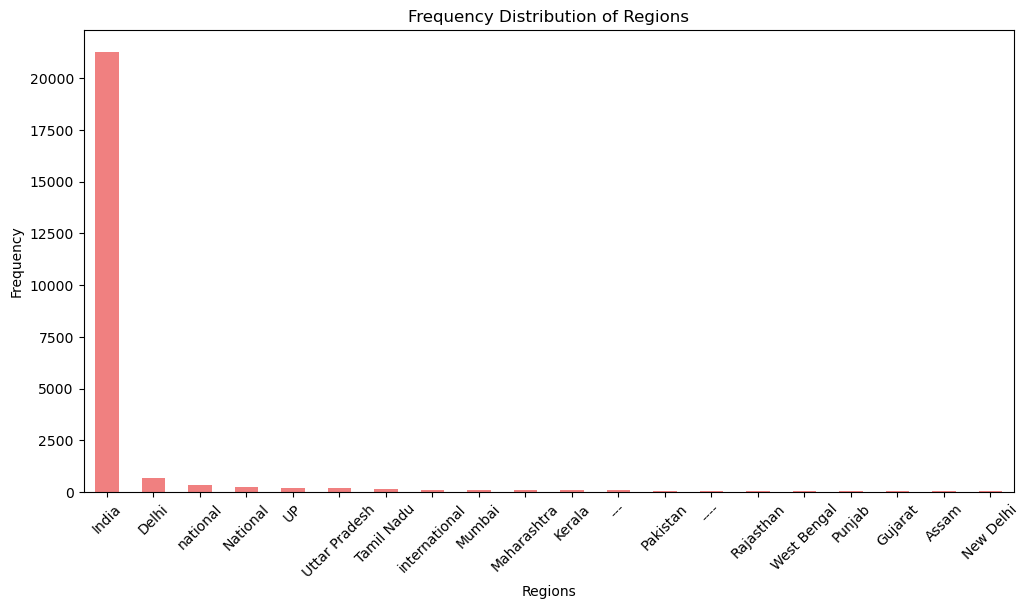

In [ ]:
#Frequency analysis on the "Region" column and display top 20 regions in bar chart

if "Region" in df.columns:
    region_frequency = df["Region"].value_counts()
    print(region_frequency)

    plt.figure(figsize=(12,6))
    region_frequency[:20].plot(kind='bar', color='lightcoral')  # Top 20 regions
    plt.xlabel("Regions")
    plt.ylabel("Frequency")
    plt.title("Frequency Distribution of Regions")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Region' not found in dataset.")

#Findings: Some regions appeared significantly more frequently than others. A few regions might have been misspelled or inconsistently labeled.
#Interpretation: The distribution of news across regions suggests that some areas have higher media activity or misinformation incidents. If certain regions dominate, it may indicate regional biases in the dataset. Cleaning and standardizing region names can improve analysis accuracy.


In [ ]:
df=pd.read_excel("Bharatfakenews.xlsx")
df2= df.drop(columns=['id',"Media_Link",'Fact_Check_Link'])
df2.head()

,Author_Name,Fact_Check_Source,Source_Type,Statement,Eng_Trans_Statement,News Body,Eng_Trans_News_Body,Publish_Date,News_Category,Language,Region,Platform,Text,Video,Image,Label
0,Shinjinee Majumder,Alt News,IFCN,फ़ैक्ट-चेक: तेलंगाना में एक रिपोर्टर ने गृह मंत...,Fact-check: A reporter in Telangana stopped sp...,सोशल मीडिया पर एक वीडियो वायरल है जिसमें एक पत...,A video is viral on social media in which a jo...,9th July 2022,Politics,Hindi,Telangana,Twitter,no,yes,no,False
1,Kalim Ahmed,Alt News,IFCN,PM मोदी को UAE का सर्वोच्च नागरिक सम्मान मिलने...,Share by stating the old video of PM Modi's hi...,प्रधानमंत्री नरेंद्र मोदी को सोने की चेन से सम...,A video of Prime Minister Narendra Modi being ...,9th July 2022,Politics,Hindi,National,Twitter,no,yes,no,False
2,Abhishek Kumar,Alt News,IFCN,वायरल तस्वीर में सुप्रीम कोर्ट के जज सूर्यकांत...,Supreme Court judges Suryakant and JB Pardiwal...,बीते दिनों नूपुर शर्मा ने टीवी डिबेट में पैगम्...,"Recently, Nupur Sharma made an objectionable c...",7th July 2022,Politics,Hindi,National,Twitter,no,no,yes,False
3,Abhishek Kumar,Alt News,IFCN,मीडिया ने दी ग़लत ख़बर: कटनी में मुस्लिम सरपंच क...,Media gave wrong news: After the victory of Mu...,एक वीडियो सोशल मीडिया पर वायरल है. इसे शेयर कर...,A video is viral on social media. While sharin...,5th July 2022,Politics,Hindi,Madhya Pradesh,Twitter,no,no,yes,False
4,Kinjal,Alt News,IFCN,महिला ने राहुल गांधी को कश्मीर मुद्दे पर मोदी ...,The woman lashed out at Rahul Gandhi to oppose...,सोशल मीडिया पर राहुल गांधी का एक वीडियो वायरल ...,A video of Rahul Gandhi has gone viral on soci...,4th July 2022,Politics,Hindi,Kashmir,Twitter,no,yes,no,True


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)  # Limiting to top 5000 words
tfidf_matrix = tfidf_vectorizer.fit_transform(df2["Eng_Trans_Statement"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

top_tfidf_words = tfidf_df.sum().sort_values(ascending=False).head(20)
print("Top TF-IDF Words:", top_tfidf_words)

Top TF-IDF Words: fact      37.601853
video     37.441493
check     36.705144
truth     26.716456
viral     24.365178
did       21.432414
learn     20.753926
old       17.638367
really    14.608929
post      14.048168
photo     12.630525
shared    12.626747
fake      11.114301
claims    10.219656
bjp        9.888622
police     8.723055
image      8.540718
claim      8.439862
modi       8.126605
finds      7.763961
dtype: float64


In [ ]:
#N-Gram Frequency

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words="english")
    X = vectorizer.fit_transform(texts)
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

    return sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_k]

# Get top n-grams
top_bigrams = get_top_ngrams(df2["Eng_Trans_Statement"], n=2)
top_trigrams = get_top_ngrams(df2["Eng_Trans_Statement"], n=3)

print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)

Top Bigrams: [('fact check', 285), ('learn truth', 99), ('check video', 58), ('old video', 44), ('finds truth', 36), ('post viral', 35), ('nupur sharma', 27), ('know truth', 18), ('viral video', 18), ('vuo post', 18)]
Top Trigrams: [('fact check video', 55), ('vuo post viral', 17), ('fake post viral', 14), ('fact check did', 13), ('fact check old', 11), ('check old video', 8), ('post viral claims', 8), ('fact check photos', 6), ('sidhu moose wala', 6), ('year old video', 6)]
